In [37]:
import numpy as np
import matplotlib.pyplot as plt
import xcorr
from twentyonecmFAST import load_binary_data, calc_PS_1d

In [25]:
z = 7.04
halos = np.loadtxt('../../data/halos_z7.04_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]
idx = np.where(halo_pos[:, 2] == 127)[0]

In [26]:
lya_cube = xcorr.cube_brightness(halo_mass, halo_pos, z)

In [27]:
lya_ps, k = xcorr.dimensional_ps(lya_cube, 200, bins = 14, log_bins = True)

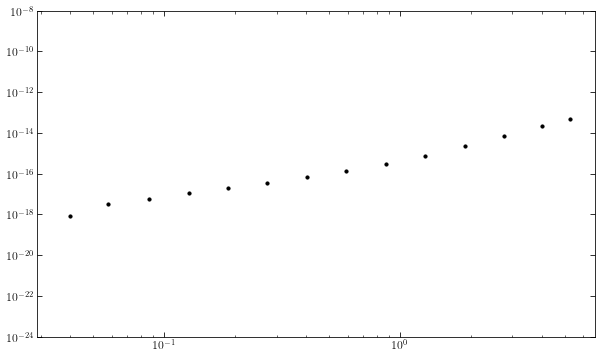

In [28]:
plt.figure(figsize = (10, 6))
plt.scatter(k, lya_ps, color = 'black', s = 10)
plt.plot(k, lya_ps, alpha = 0)
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-24, 1e-8])
plt.show()

In [58]:
temp_21 = load_binary_data('../../data/delta_T_v3_z007.04_nf0.233584_useTs1_256_200Mpc')
temp_21 = np.reshape(temp_21, (256, 256, 256))
ps_21, k_21 = xcorr.dimensional_ps(temp_21, 200, bins = 25, log_bins = True)

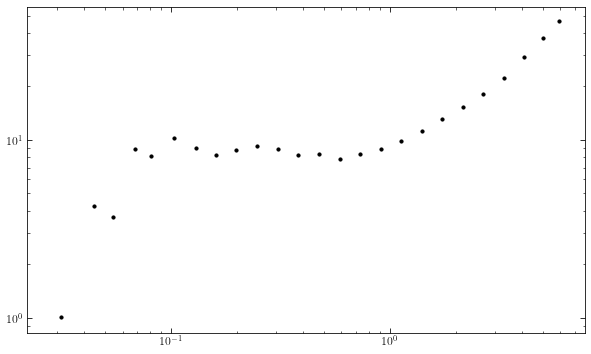

In [53]:
plt.figure(figsize = (10, 6))
plt.scatter(k_21, ps_21, color = 'black', s = 10)
plt.plot(k_21, ps_21, alpha = 0)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [57]:
ps_21.max(), ps_21.min()

(46.484986608197225, 1.0033136734113517)

In [54]:
x = np.linspace(0, 200, 256)
ps, k = calc_PS_1d(temp_21, x, x, x)

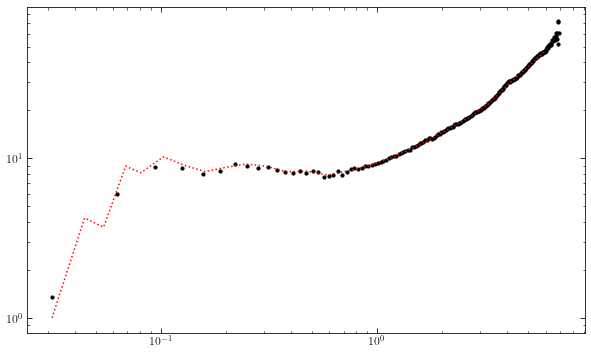

In [55]:
plt.figure(figsize = (10, 6))
plt.scatter(k, k **3 / (2 * np.pi ** 2) * ps, color = 'black', s = 10)
plt.plot(k_21, ps_21, 'r:')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [35]:
ccc, k = xcorr.r(temp_21, lya_cube, 200, log_bins = True, bins = 18)

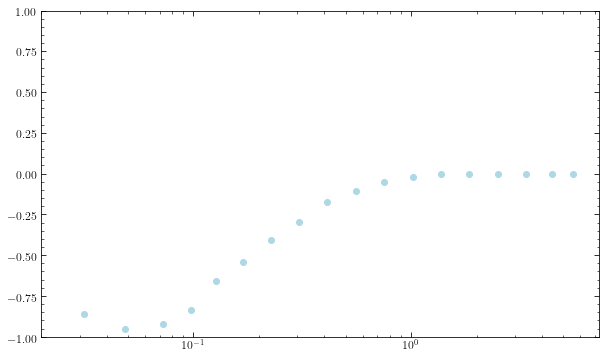

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(k, ccc, color = 'lightblue')
#plt.plot(k, ccc, color = 'skyblue')
plt.xscale('log')
plt.ylim([-1, 1])
plt.show()